## Testing on IBMQ - belem and IBMQ - athens noise models

In [36]:
from qiskit import * 
import matplotlib.pyplot as plt 
from qiskit.extensions import UnitaryGate
from qiskit.circuit import add_control 
from qiskit.tools.visualization import plot_bloch_multivector,plot_histogram
import numpy as np 
from qiskit_textbook.tools import array_to_latex

from qiskit.tools.jupyter import backend_overview
from qiskit import IBMQ 
IBMQ.load_account() 
provider = IBMQ.get_provider(hub='ibm-q-education', group='indraprasta-ins-1', project='intro-quantum-co')
%matplotlib inline 

ibmqfactory.load_account:WARNING:2021-05-19 17:29:11,714: Credentials are already in use. The existing account in the session will be replaced.


In [37]:
%qiskit_backend_overview

## Getting Noise models for simulation

In [13]:
from qiskit.providers.aer.noise import NoiseModel

In [15]:
belem = provider.get_backend('ibmq_belem')
casb = provider.get_backend('ibmq_casablanca')
quito = provider.get_backend('ibmq_quito')

In [16]:
belem_noise = NoiseModel.from_backend(backend=belem)
casb_noise = NoiseModel.from_backend(backend=casb)
quito_noise = NoiseModel.from_backend(backend = quito)

Device reported a gate error parameter greater than maximum allowed value (1.000000 > 0.800000). Truncating to maximum value.
Device model returned a depolarizing error parameter greater than maximum allowed value (1.066926 > 1.066667). Truncating to maximum value.
Device reported a gate error parameter greater than maximum allowed value (1.000000 > 0.800000). Truncating to maximum value.
Device model returned a depolarizing error parameter greater than maximum allowed value (1.066895 > 1.066667). Truncating to maximum value.


### Create the two circuits for comparison

In [17]:
from faster_basic_qpe import fast_QPE 
from vanilla_qpe import QPE 

- **Define Unitary**

In [18]:
U= np.array([[1,0],
              [0,np.exp(2*np.pi*1j*(1/5))]])


Circuit for QFT of 4


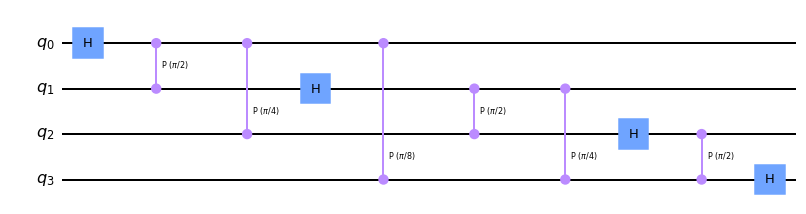

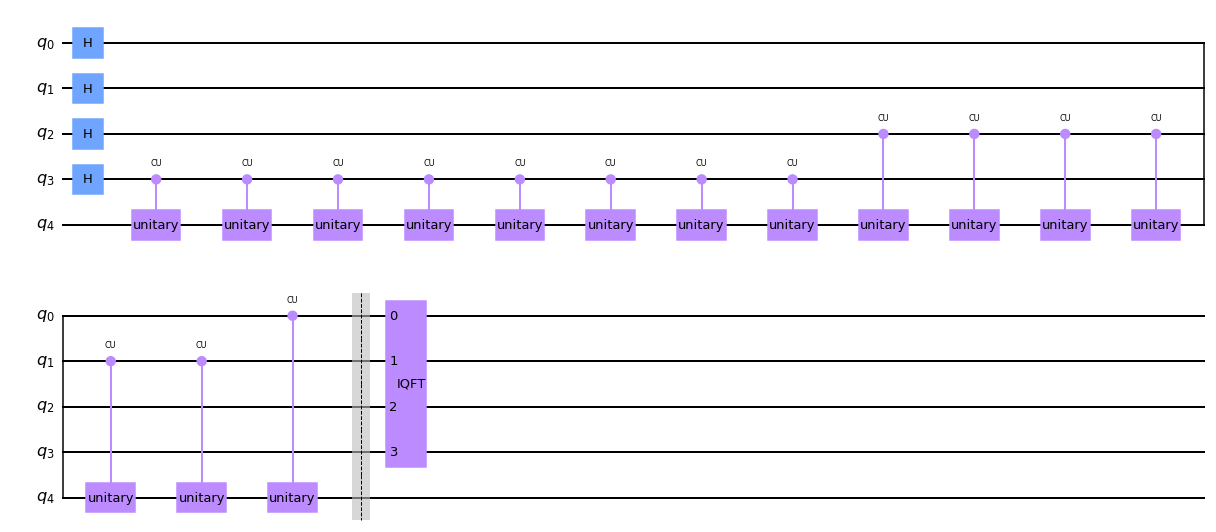

In [19]:
basic_qpe_circ = QPE(precision=4,unitary=U).get_QPE(show=True)

Circuit for QFT of 4


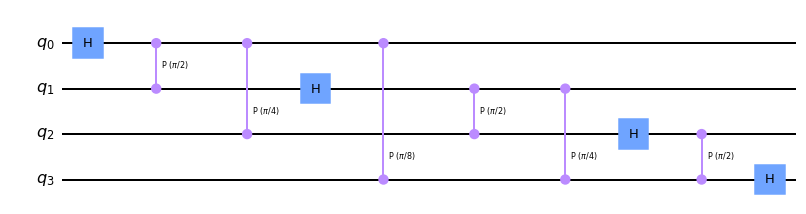

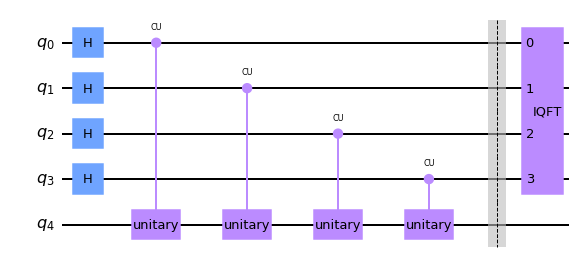

In [20]:
faster_qpe_circ = fast_QPE(precision=4,unitary=U).get_QPE(show=True)

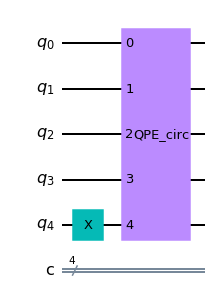

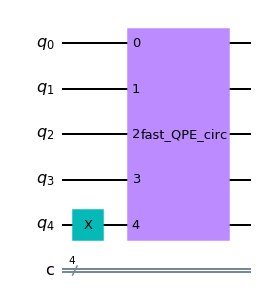

In [21]:
q1, q2 = QuantumCircuit(5,4), QuantumCircuit(5,4) 

q1.x(4)
q1.append(basic_qpe_circ,qargs = [0,1,2,3,4])
display(q1.draw('mpl'))

q2.x(4)
q2.append(faster_qpe_circ,qargs = [0,1,2,3,4])
display(q2.draw('mpl'))

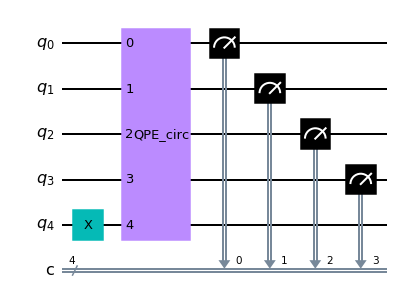

In [22]:
q1.measure([0,1,2,3],[0,1,2,3])
q1.draw('mpl')

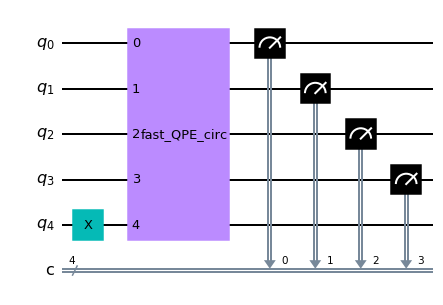

In [23]:
q2.measure([0,1,2,3],[0,1,2,3])
q2.draw('mpl')

## Executing the Circuits on Belem

In [24]:
backend = Aer.get_backend('qasm_simulator')

In [25]:
shots = 2**12
q1_copy = q1 
q2_copy = q2 
c1_belem = execute(q1,backend = backend,noise_model = belem_noise,shots = shots).result().get_counts()
sim_basic_belem = execute(q1_copy,backend = backend,shots = shots).result().get_counts()
c2_belem = execute(q2,backend = backend,noise_model = belem_noise,shots = shots).result().get_counts()
sim_fast_belem = execute(q2_copy,backend = backend,shots = shots).result().get_counts()


- Results for Belem 

Text(0.5, 1.0, 'Faster QPE circuit result')

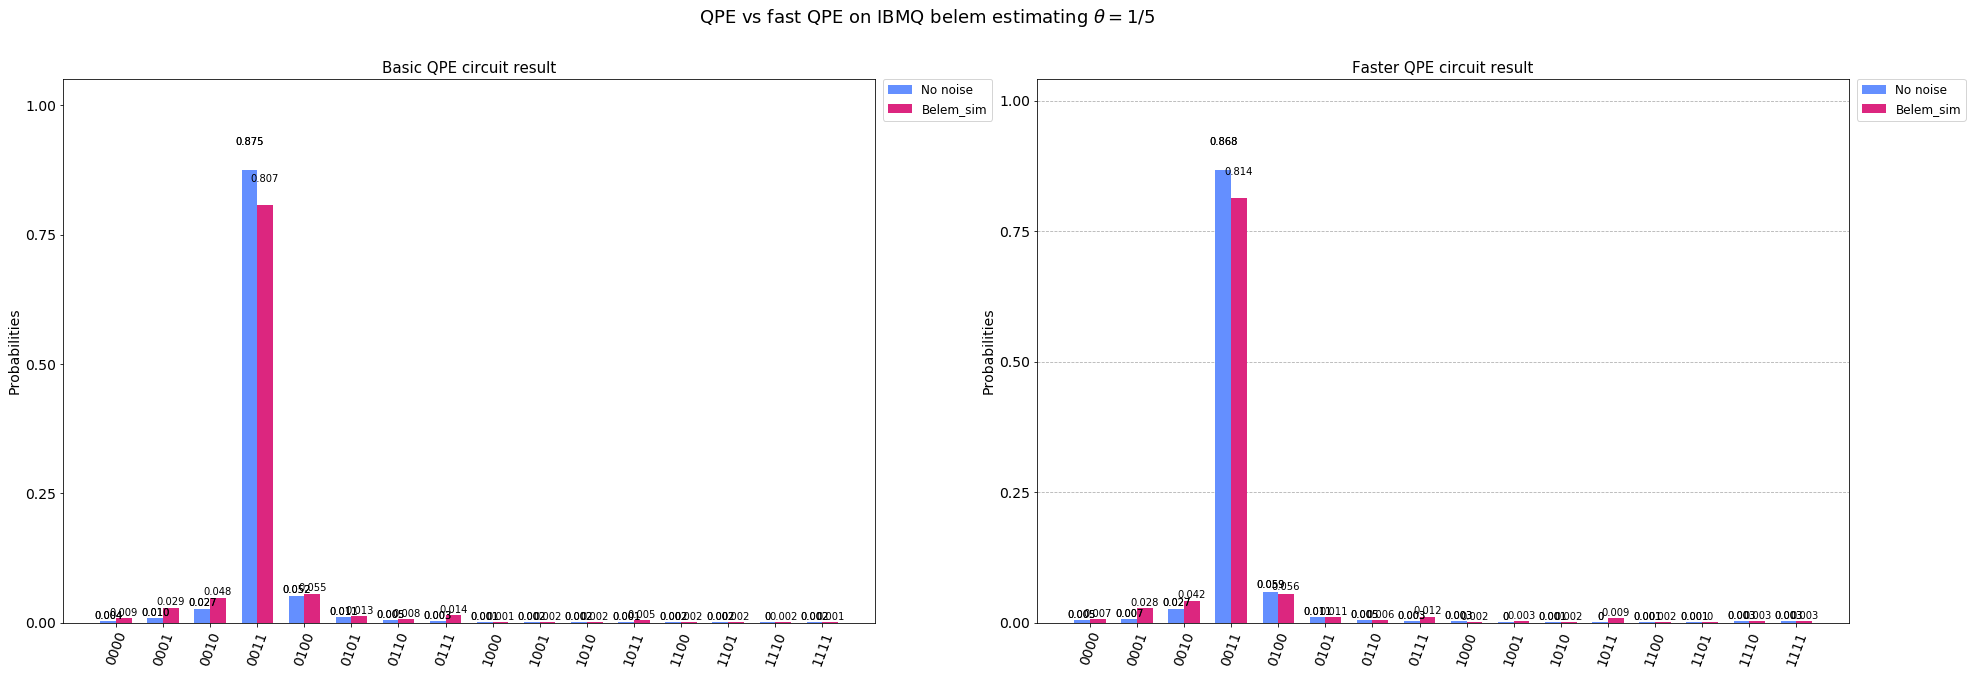

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(32,10)) 
fig.suptitle("QPE vs fast QPE on IBMQ belem estimating $\\theta=1/5$",fontsize=18)
plot_histogram([sim_basic_belem,c1_belem], ax = ax[0], legend = ['No noise','Belem_sim'])
plot_histogram([sim_fast_belem,c2_belem], ax = ax[1], legend = ['No noise','Belem_sim'])
ax[0].set_title("Basic QPE circuit result",fontsize = 15)
ax[1].set_title("Faster QPE circuit result",fontsize = 15)

## Executing circuits on Casablanca 

In [29]:
shots = 2**12
q1_copy = q1 
q2_copy = q2 
c1_casb = execute(q1,backend = backend,noise_model = casb_noise,shots = shots).result().get_counts()
sim_basic_casb = execute(q1_copy,backend = backend,shots = shots).result().get_counts()
c2_casb = execute(q2,backend = backend,noise_model = casb_noise,shots = shots).result().get_counts()
sim_fast_casb = execute(q2_copy,backend = backend,shots = shots).result().get_counts()


- Results for Athens

Text(0.5, 1.0, 'Faster QPE circuit result')

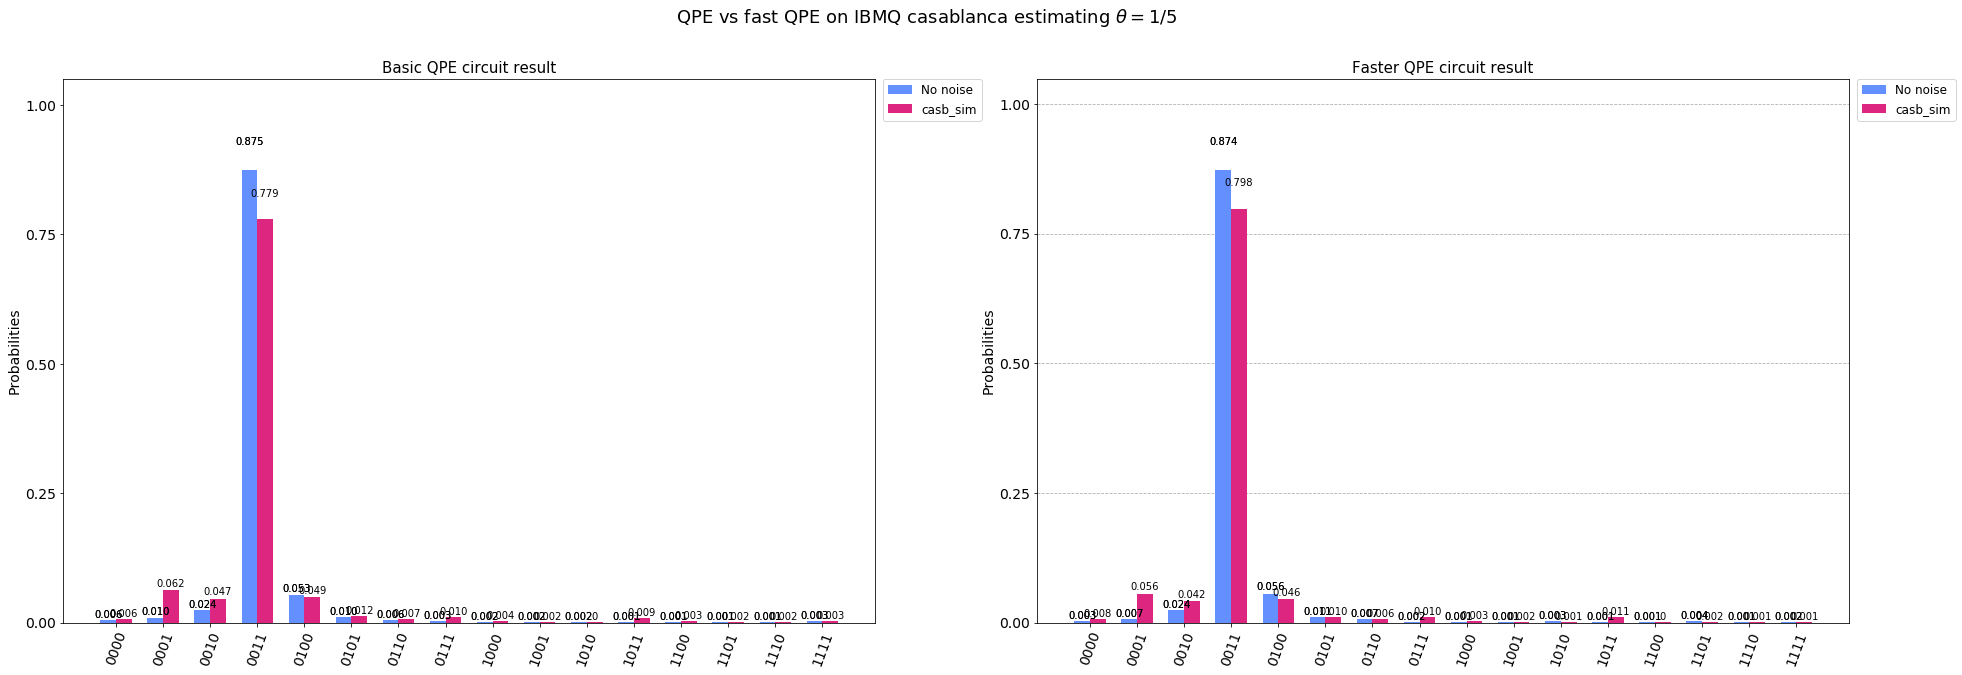

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(32,10)) 
fig.suptitle("QPE vs fast QPE on IBMQ casablanca estimating $\\theta=1/5$",fontsize=18)
plot_histogram([sim_basic_casb,c1_casb], ax = ax[0], legend = ['No noise','casb_sim'])
plot_histogram([sim_fast_casb,c2_casb], ax = ax[1], legend = ['No noise','casb_sim'])
ax[0].set_title("Basic QPE circuit result",fontsize = 15)
ax[1].set_title("Faster QPE circuit result",fontsize = 15)

## Executing circuits for quito

In [34]:
shots = 2**12
q1_copy = q1 
q2_copy = q2 
c1_quito = execute(q1,backend = backend,noise_model = quito_noise,shots = shots).result().get_counts()
sim_basic_quito = execute(q1_copy,backend = backend,shots = shots).result().get_counts()
c2_quito = execute(q2,backend = backend,noise_model = quito_noise,shots = shots).result().get_counts()
sim_fast_quito = execute(q2_copy,backend = backend,shots = shots).result().get_counts()


Text(0.5, 1.0, 'Faster QPE circuit result')

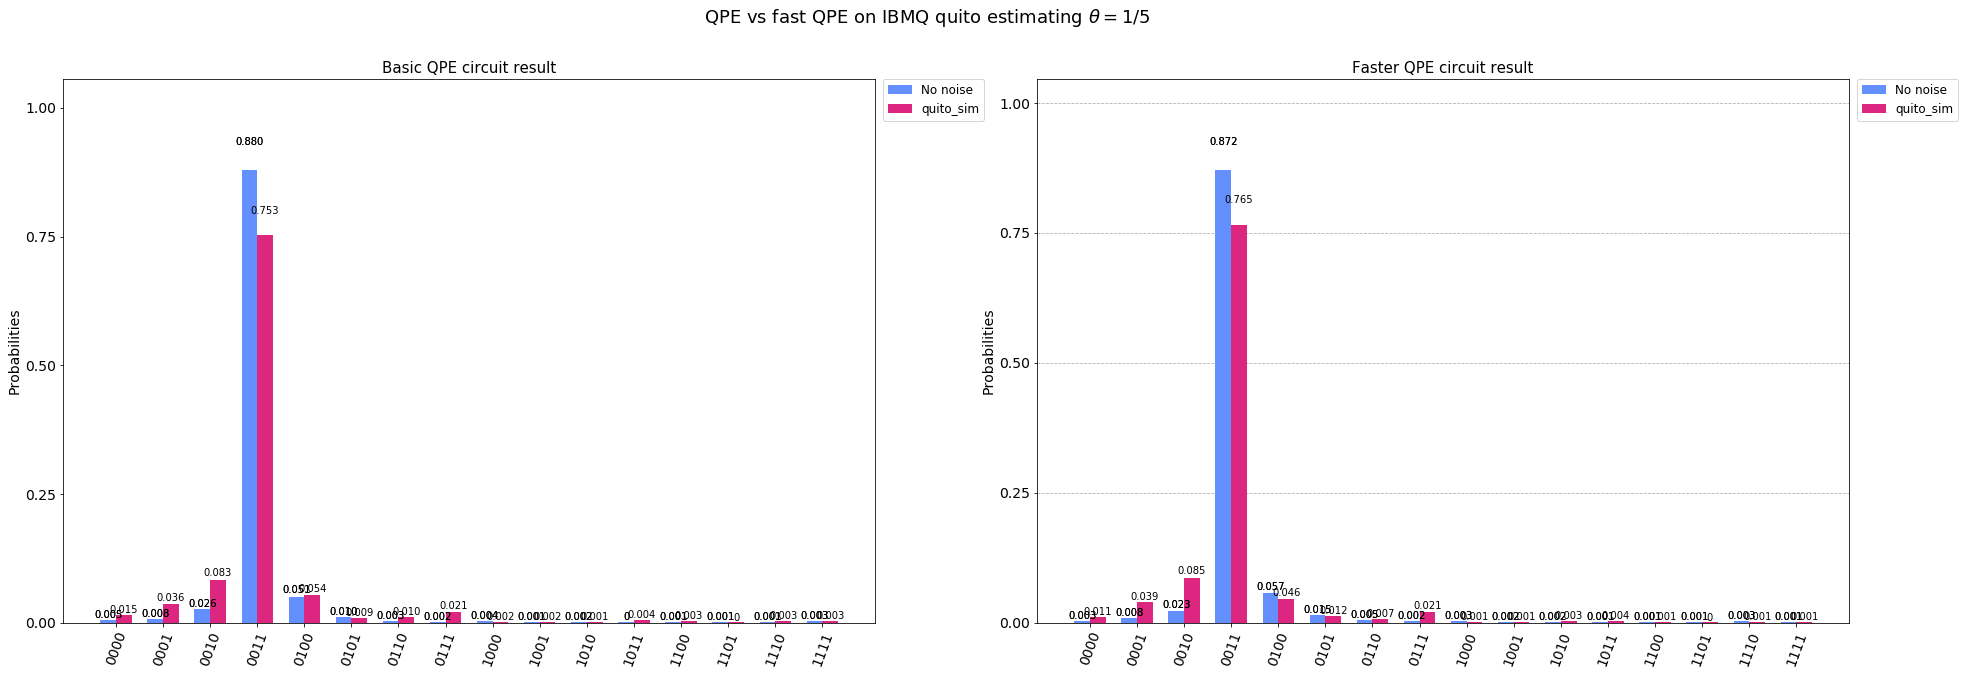

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(32,10)) 
fig.suptitle("QPE vs fast QPE on IBMQ quito estimating $\\theta=1/5$",fontsize=18)
plot_histogram([sim_basic_quito,c1_quito], ax = ax[0], legend = ['No noise','quito_sim'])
plot_histogram([sim_fast_quito,c2_quito], ax = ax[1], legend = ['No noise','quito_sim'])
ax[0].set_title("Basic QPE circuit result",fontsize = 15)
ax[1].set_title("Faster QPE circuit result",fontsize = 15)

## Conclusion
- Results are actually better in the Quito QC and Belem QC with the faster basic QPE